In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from consumption_saving import *

In [3]:
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()

In [4]:
value_function_employment(model.par, model.sol)

UnboundLocalError: cannot access local variable 'c_next' where it is not associated with a value

In [ ]:
model.sol.a_next_e[-1,0,:]

array([-2.00179848e+00, -1.90632757e+00, -1.80052594e+00, -1.69472431e+00,
       -1.58892269e+00, -1.48312106e+00, -1.37731944e+00, -1.27151781e+00,
       -1.16571618e+00, -1.05991456e+00, -9.54112933e-01, -8.48311307e-01,
       -7.42509681e-01, -6.36708055e-01, -5.30906429e-01, -4.25104803e-01,
       -3.19303177e-01, -2.13501552e-01, -1.07699926e-01, -1.89829968e-03])

In [ ]:
print(np.shape(model.par.V_e_t_a))
model.par.V_e_t_a[:,0]

(41, 20)


array([-3.76986566e+00, -3.47203632e+00, -3.19487999e+00, -2.93989359e+00,
       -2.70872545e+00, -2.50319624e+00, -2.32532383e+00, -2.17735267e+00,
       -2.06178888e+00, -1.98144246e+00, -1.93947826e+00, -1.69942311e+00,
       -1.47359355e+00, -1.26335901e+00, -1.07028550e+00, -8.96176294e-01,
       -7.43123923e-01, -6.13577822e-01, -5.10433688e-01, -4.37153868e-01,
       -3.97933155e-01, -2.55884947e-01, -1.21871595e-01,  3.31201507e-03,
        1.18744292e-01,  2.23346136e-01,  3.15839483e-01,  3.94690167e-01,
        4.58026996e-01,  5.03523222e-01,  5.28215835e-01,  5.28215835e-01,
        5.28215835e-01,  5.28215835e-01,  5.28215835e-01,  5.28215835e-01,
        5.28215835e-01,  5.28215835e-01,  5.28215835e-01,  5.28215835e-01,
        5.28215835e-01])

In [ ]:
print(np.shape(model.par.V_e))
model.par.V_e[-1,:,-1]

(41, 20, 20)


array([ 4.22165824e+00,  3.33000603e+00,  2.57389630e+00,  1.93676639e+00,
        1.40574585e+00,  9.70556688e-01,  6.22810246e-01,  3.55536882e-01,
        1.62859438e-01,  3.97595119e-02, -1.80942125e-02, -1.44748825e-02,
       -1.12578621e-02, -8.44311104e-03, -6.03058923e-03, -4.02025629e-03,
       -2.41207168e-03, -1.20599470e-03, -4.01984490e-04,  0.00000000e+00])

In [ ]:
V_u,s = unemployment_ss(model.par, -1,-1)
print(V_u,s)

bellman_difference(-1) = 0.43839623238138503
bellman_difference(1) = -0.4075132077100925
-0.07978311509106221 0.4279934149724034


In [ ]:
solve_search_and_consumption(model.par, model.sol)

bellman_difference(-1) = -0.8473345355358313
bellman_difference(1) = -0.9619239118637269
The function does not have different signs at the endpoints. Trying to find a valid interval...
Trying interval [-1, 0] with function values -0.8473345355358313, -0.9541304736997791
Trying interval [-5, 0] with function values 0.5698742171199607, -0.9541304736997791
Found valid interval: [-5, 0] with function values 0.5698742171199607, -0.9541304736997791
bellman_difference(-1) = -0.8473345355358313
bellman_difference(1) = -0.9619239118637269
The function does not have different signs at the endpoints. Trying to find a valid interval...
Trying interval [-1, 0] with function values -0.8473345355358313, -0.9541304736997791
Trying interval [-5, 0] with function values 0.5698742171199607, -0.9541304736997791
Found valid interval: [-5, 0] with function values 0.5698742171199607, -0.9541304736997791
bellman_difference(-1) = -0.8645635753886665
bellman_difference(1) = -0.9517639100340987
The function does

In [ ]:
model.sol.s[-3,:]

array([0.4355905 , 0.43559149, 0.4355904 , 0.43559106, 0.43559088,
       0.43559027, 0.35150229, 0.31484524, 0.3074006 , 0.30505687,
       0.30386906, 0.30519862, 0.30622717, 0.30967058, 0.31308683,
       0.31586678, 0.32274974, 0.32274966, 0.32274965, 0.32274992])

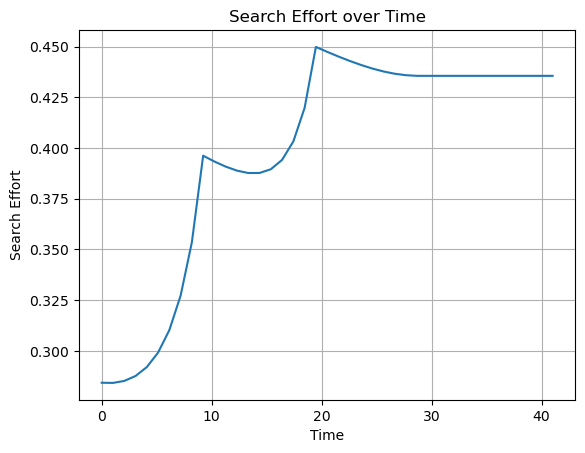

In [ ]:
import matplotlib.pyplot as plt

# Assuming solve_search_effort returns a tuple where the first element is the time array and the second element is the search effort array
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sol.s[:model.par.T,0])
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()


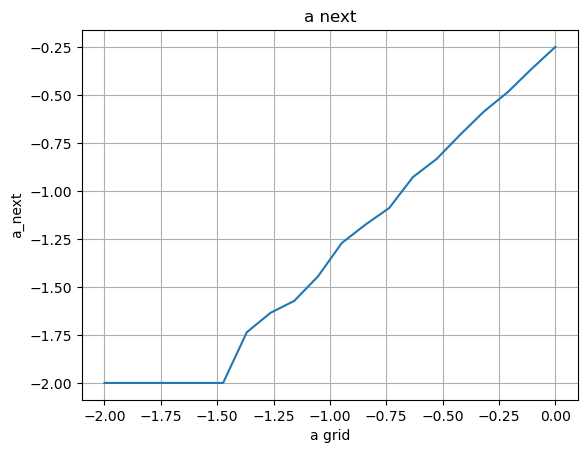

In [ ]:

plt.plot(model.par.a_grid, model.sol.a_next[0,:])
plt.xlabel('a grid')
plt.ylabel('a_next')
plt.title('a next')
plt.grid(True)
plt.show()


In [ ]:
model1 = model.copy()
# model1.par.L = -0.00
# model1.par.a_grid = np.linspace(model1.par.L, model1.par.A_0, 20)
model1.par.euler = False

In [ ]:
value_function_employment(model1.par, model1.sol)

In [ ]:
solve_search_and_consumption(model1.par, model1.sol)

bellman_difference(-1) = -0.891082570182139
bellman_difference(1) = -0.9416442027708133
The function does not have different signs at the endpoints. Trying to find a valid interval...
Trying interval [-1, 0] with function values -0.891082570182139, -0.9658646364764762
Trying interval [-5, 0] with function values 0.3980706949952104, -0.9658646364764762
Found valid interval: [-5, 0] with function values 0.3980706949952104, -0.9658646364764762
bellman_difference(-1) = -0.891082570182139
bellman_difference(1) = -0.9416442027708133
The function does not have different signs at the endpoints. Trying to find a valid interval...
Trying interval [-1, 0] with function values -0.891082570182139, -0.9658646364764762
Trying interval [-5, 0] with function values 0.3980706949952104, -0.9658646364764762
Found valid interval: [-5, 0] with function values 0.3980706949952104, -0.9658646364764762
bellman_difference(-1) = -0.8601365601460538
bellman_difference(1) = -0.9536351317570698
The function does not

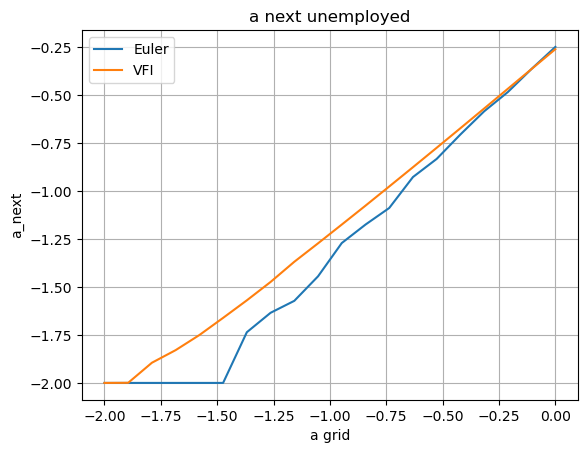

In [ ]:

plt.plot(model.par.a_grid, model.sol.a_next[0,:], label='Euler')
plt.plot(model1.par.a_grid, model1.sol.a_next[0,:], label='VFI')
plt.xlabel('a grid')
plt.ylabel('a_next')
plt.title('a next unemployed')
plt.legend()
plt.grid(True)
plt.show()


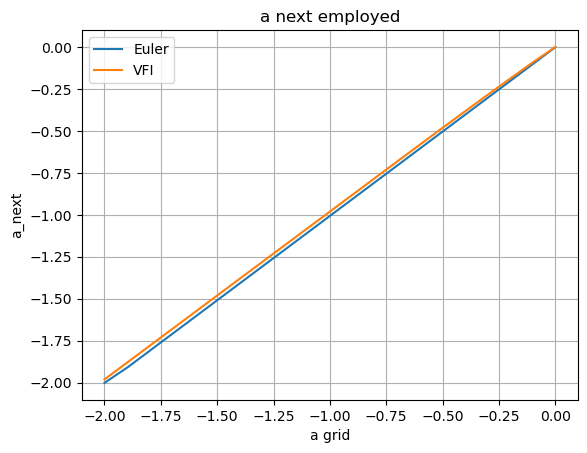

In [ ]:

plt.plot(model.par.a_grid, model.sol.a_next_e[-1,3,:], label='Euler')
plt.plot(model1.par.a_grid, model1.sol.a_next_e[-1,3,:], label='VFI')
plt.xlabel('a grid')
plt.ylabel('a_next')
plt.title('a next employed')
plt.legend()
plt.grid(True)
plt.show()

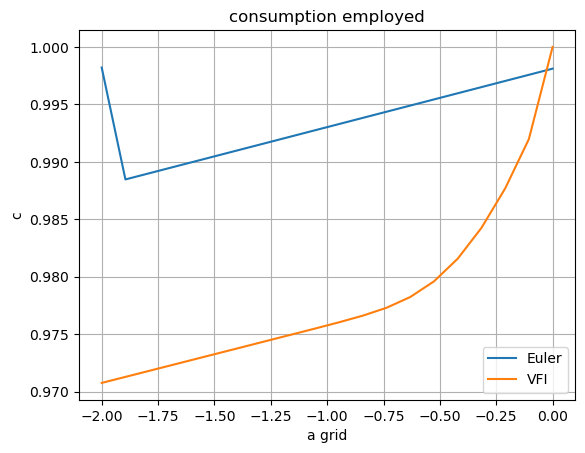

In [ ]:
plt.plot(model.par.a_grid, model.sol.c_e[-1,0,:], label='Euler')
plt.plot(model1.par.a_grid, model1.sol.c_e[-1,0,:], label='VFI')
plt.xlabel('a grid')
plt.ylabel('c')
plt.title('consumption employed')
plt.legend()
plt.grid(True)
plt.show()

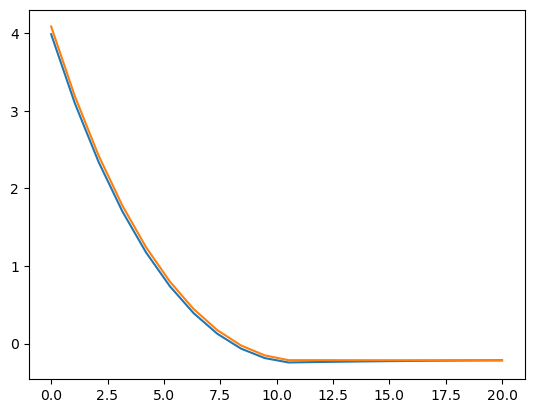

In [ ]:
time = np.linspace(0, model1.par.N + model1.par.M, model1.par.N + model1.par.M)
n = np.linspace(0, model1.par.N+model.par.M, model1.par.N+model.par.M)
plt.plot(time, model.par.V_e[-1,:,18])
plt.plot(time, model1.par.V_e[-1,:,18])

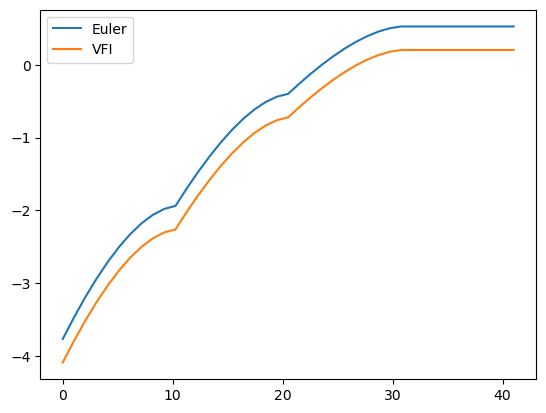

In [ ]:
time = np.linspace(0, model1.par.T, model1.par.T)
n = np.linspace(0, model1.par.N+model.par.M, model1.par.N+model.par.M)
plt.plot(time, model.par.V_e[:,0,0], label='Euler')
plt.plot(time, model1.par.V_e[:,0,0], label='VFI')
plt.legend()

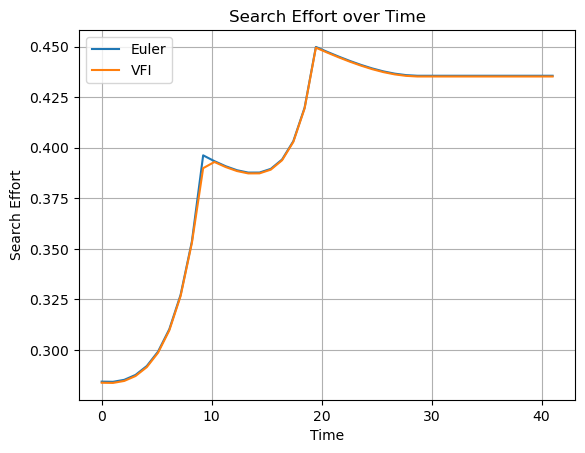

In [ ]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sol.s[:model.par.T,0], label='Euler')
plt.plot(time, model1.sol.s[:model1.par.T,0], label='VFI')
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
solve_forward(model.par, model.sol, model.sim)

In [ ]:
solve_forward(model1.par, model1.sol, model1.sim)

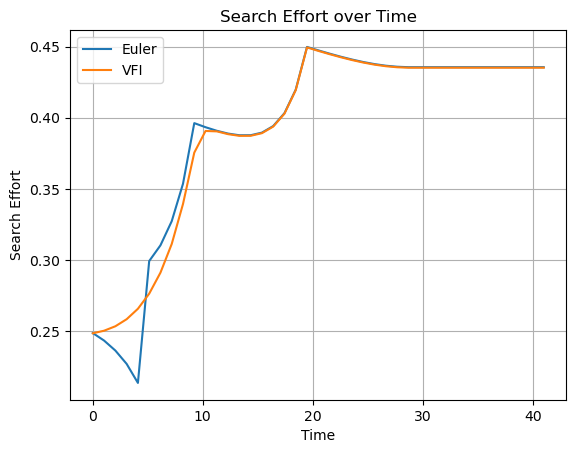

In [ ]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sim.s[:model.par.T], label='Euler')
plt.plot(time, model1.sim.s[:model.par.T], label='VFI')

plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()


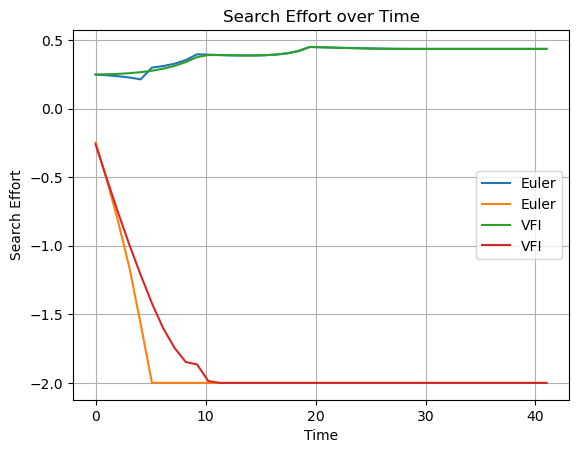

In [ ]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sim.s, label='Euler')
plt.plot(time, model.sim.a_next, label='Euler')
plt.plot(time, model1.sim.s, label='VFI')
plt.plot(time, model1.sim.a_next, label='VFI')

plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()

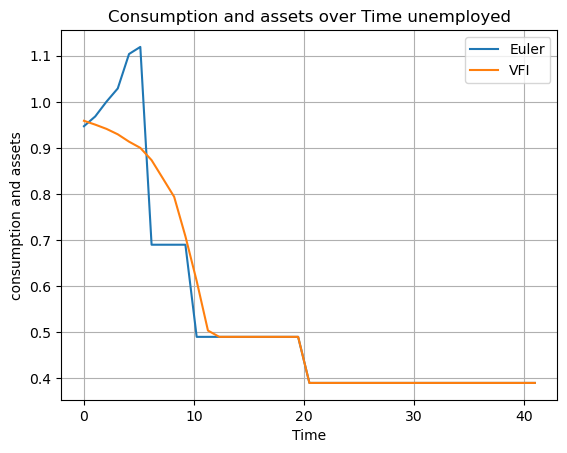

In [ ]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sim.c, label='Euler')
# plt.plot(time, model.sim.a_next, label='Euler')
plt.plot(time, model1.sim.c, label='VFI')
# plt.plot(time, model1.sim.a_next, label='VFI')

plt.xlabel('Time')
plt.ylabel('consumption and assets')
plt.title('Consumption and assets over Time unemployed' )
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
solve_forward_employment(model.par, model.sol, model.sim)

In [ ]:
solve_forward_employment(model1.par, model1.sol, model1.sim)

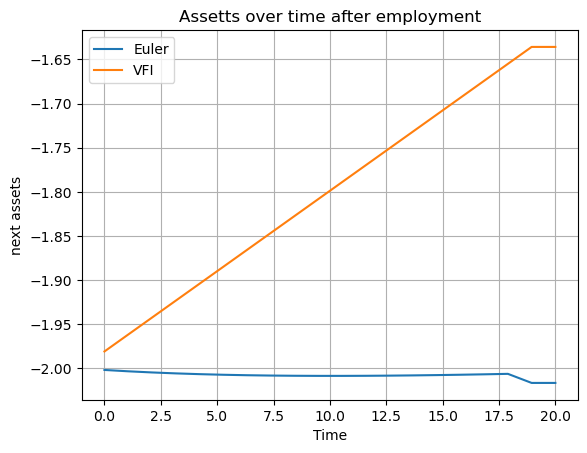

In [ ]:
time = np.linspace(0, model.par.N+model.par.M, model.par.N+model.par.M)
plt.plot(time, model.sim.a_e[-1,:], label='Euler')
plt.plot(time, model1.sim.a_e[-1,:], label='VFI')


plt.xlabel('Time')
plt.ylabel('next assets')
plt.title('Assetts over time after employment')
plt.grid(True)
plt.legend()
plt.show()

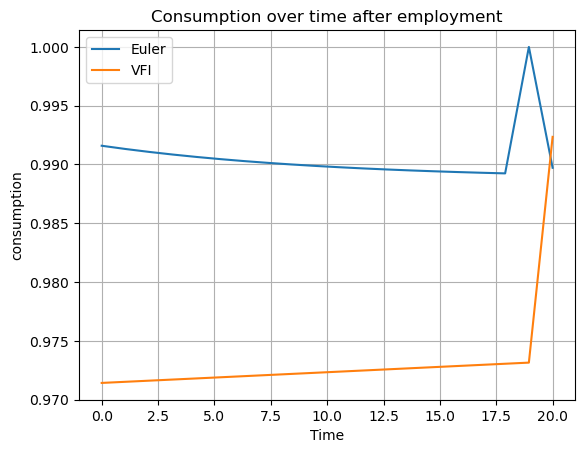

In [ ]:
time = np.linspace(0, model.par.N+model.par.M, model.par.N+model.par.M)
plt.plot(time, model.sim.c_e[10,:], label='Euler')
plt.plot(time, model1.sim.c_e[10,:], label='VFI')


plt.xlabel('Time')
plt.ylabel('consumption')
plt.title('Consumption over time after employment')
plt.grid(True)
plt.legend()
plt.show()